In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
data= pd.read_csv('online_shoppers_intention.csv')

In [7]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
data.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [10]:
data.shape

(12330, 18)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
#Conversion to Numerical format
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)

In [14]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [15]:
# Assigning numbers to Months
temp_data = data.copy()
month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
temp_data['Month']=temp_data['Month'].map(month_map)

#Assigning numbers to Visitor Type
vistor_map={'New_Visitor':0,'Returning_Visitor':1,'Other':2}
temp_data['VisitorType']=temp_data['VisitorType'].map(vistor_map)
temp_data['Weekend'] = temp_data['Weekend'].astype(int)

In [16]:
temp_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


<AxesSubplot:>

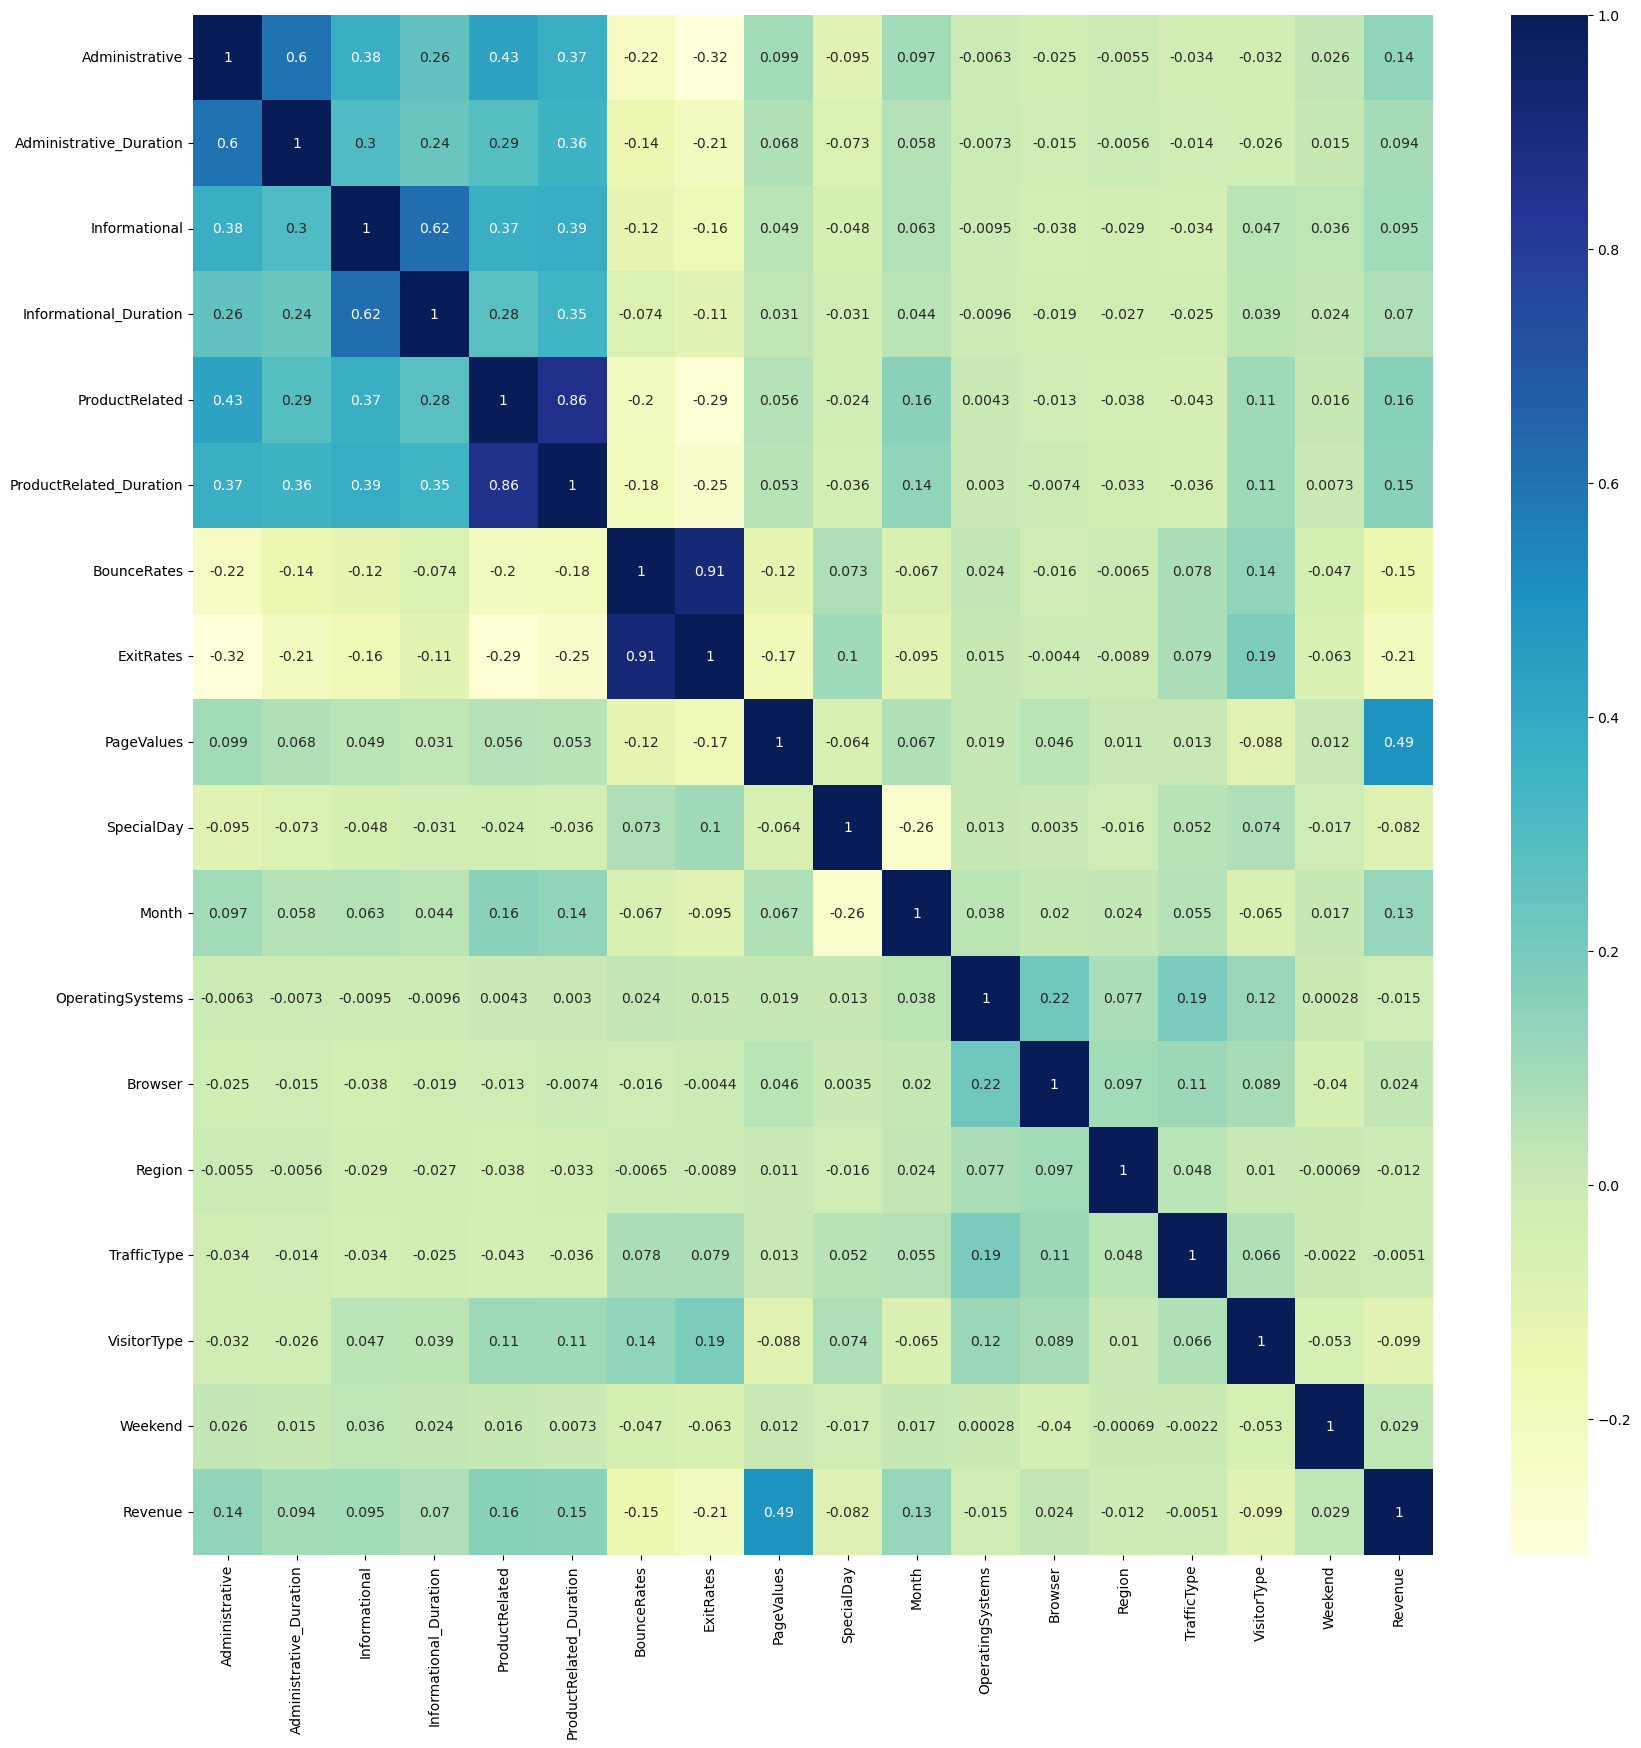

In [17]:
# Correlations between features.

correlations=temp_data.corr()
correlations

plt.figure(figsize=(20,20))
sns.heatmap(correlations,xticklabels=correlations.columns,
            yticklabels=correlations.columns,annot=True, cmap="YlGnBu")

In [18]:
def train_test(dataset, testSize, attrib='Revenue'):
  
  X = dataset.drop([attrib], axis=1)
  y = dataset[attrib]

  return train_test_split(X, y, test_size = testSize, random_state=12)

In [19]:
## Evaluation
def evaluate_model(y_test, y_pred):

  acc = accuracy_score(y_test, y_pred)
  print('Testing Accuracy : ', acc)

  # classification report
  cr = classification_report(y_test, y_pred)
  print('Classification Report :')
  print(cr)

  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  TP, FN, FP, TN = cm[1][1], cm[1][0], cm[0][1],cm[0][0]

  # true positive rate
  TPR = TP/(TP+FN)
  # true negative rate
  TNR = TN/(TN+FP) 
  
  # false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)

  print('Sensitivity/tp_rate = ', TPR)
  print('Specificity/tn_rate = ', TNR)
  print('fp rate = ',FPR)
  print('fn rate = ',FNR)

  # confusion matrix
  
  print('Confusion Matrix :')
  
  plt.rcParams['figure.figsize'] = (6, 6)
  sns.heatmap(cm ,annot = True)

  return TPR, TNR, FPR, FNR

In [20]:
X_train, X_test, y_train, y_test = train_test(temp_data, 0.2)

In [21]:
##Standardizing data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xsc_train = sc.fit_transform(X_train)
xsc_test = sc.fit_transform(X_test)

Testing Accuracy :  0.7964314679643146
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2084
           1       0.41      0.71      0.52       382

    accuracy                           0.80      2466
   macro avg       0.67      0.76      0.70      2466
weighted avg       0.86      0.80      0.82      2466

[[1692  392]
 [ 110  272]]
Sensitivity/tp_rate =  0.7120418848167539
Specificity/tn_rate =  0.8119001919385797
fp rate =  0.18809980806142035
fn rate =  0.2879581151832461
Confusion Matrix :


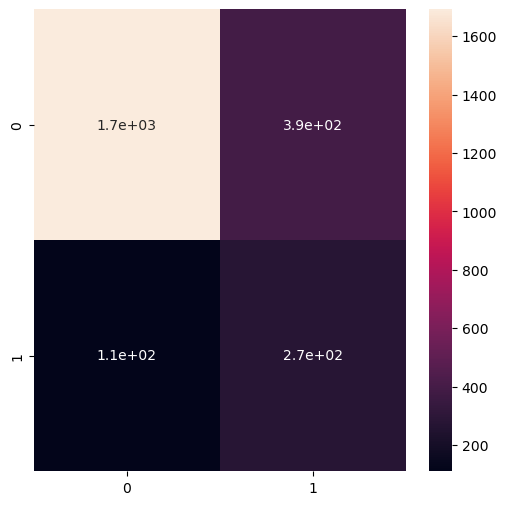

In [22]:
##Naive Bayes with normalized data
models = []

gnb = GaussianNB()

#x, y = smote_data(X_train, y_train)

y_pred = gnb.fit(xsc_train, y_train).predict(xsc_test)

models.append({'model' : gnb, 'label': 'Naive Bayes', 'x_test': xsc_test, 'y_test': y_test})


TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Shape of x_train: (9864, 17)
Shape of x_test : (2466, 17)
Testing Accuracy :  0.8856447688564477
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2084
           1       0.75      0.40      0.52       382

    accuracy                           0.89      2466
   macro avg       0.82      0.69      0.73      2466
weighted avg       0.87      0.89      0.87      2466

[[2033   51]
 [ 231  151]]
Sensitivity/tp_rate =  0.39528795811518325
Specificity/tn_rate =  0.97552783109405
fp rate =  0.024472168905950095
fn rate =  0.6047120418848168
Confusion Matrix :


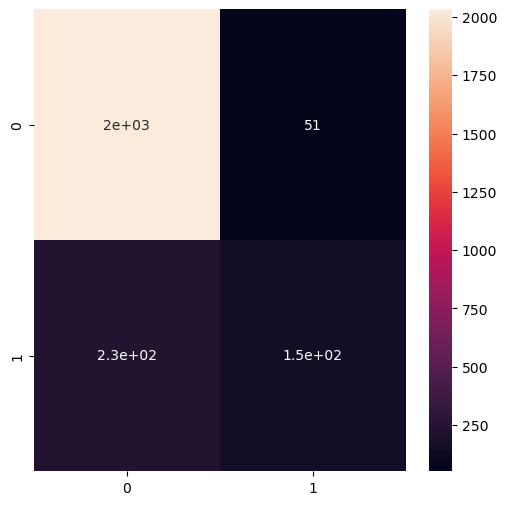

In [23]:
# Logisitic Regression With normal split data

# Split data

#x_train, x_test, y_train, y_test = split_data(temp_data, 0.3)

print("Shape of x_train:", X_train.shape)
print("Shape of x_test :", X_test.shape)


#x_train, x_test, y_train, y_test = split_data(temp_data, 0.3)

model = LogisticRegression(max_iter=4000)


model.fit(xsc_train,y_train)

y_pred = model.predict(xsc_test)

models.append({'model' : model, 'label': 'Logistic Regression', 'x_test': xsc_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

#models.append({'model' : model, 'label': 'Logistic Regression', 'x_test': X_test, 'y_test': y_test, 'TPR': TPR, 'TNR':TNR,'FPR': FPR,'FNR': FNR})


Testing Accuracy :  0.843065693430657
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2084
           1       0.49      0.43      0.46       382

    accuracy                           0.84      2466
   macro avg       0.70      0.67      0.68      2466
weighted avg       0.84      0.84      0.84      2466

[[1915  169]
 [ 218  164]]
Sensitivity/tp_rate =  0.4293193717277487
Specificity/tn_rate =  0.9189059500959693
fp rate =  0.08109404990403071
fn rate =  0.5706806282722513
Confusion Matrix :


(0.4293193717277487,
 0.9189059500959693,
 0.08109404990403071,
 0.5706806282722513)

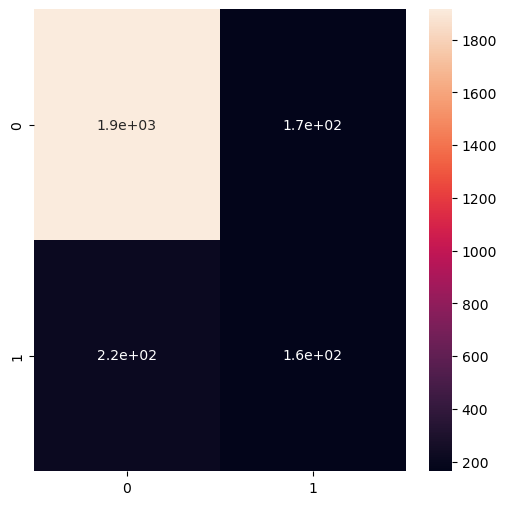

In [24]:
## Decision Tree With Normal Data

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xsc_train, y_train)

y_pred = model.predict(xsc_test)

#print('Training Accuracy : ', model.score(xsc_train, y_train))

models.append({'model' : model, 'label': 'Decision Tree', 'x_test': xsc_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

Shape of x_train: (9864, 17)
Shape of x_test : (2466, 17)
Testing Accuracy :  0.9030819140308192
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.74      0.57      0.65       382

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.90      0.90      0.90      2466

[[2009   75]
 [ 164  218]]
Sensitivity/tp_rate =  0.5706806282722513
Specificity/tn_rate =  0.9640115163147792
fp rate =  0.03598848368522073
fn rate =  0.4293193717277487
Confusion Matrix :


(0.5706806282722513,
 0.9640115163147792,
 0.03598848368522073,
 0.4293193717277487)

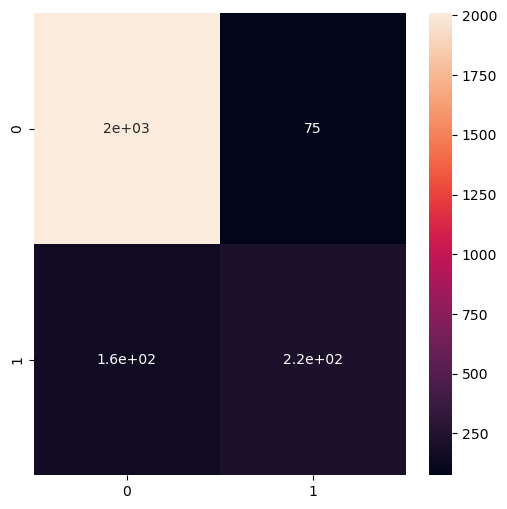

In [25]:
# RandomForest with normal train test data


#X_train, X_test, y_train, y_test = train_test(temp_data, 0.3)

print("Shape of x_train:", X_train.shape)
print("Shape of x_test :", X_test.shape)


model = RandomForestClassifier()

model.fit(xsc_train, y_train)

y_pred = model.predict(xsc_test)

models.append({'model' : model, 'label': 'Random Forest', 'x_test': xsc_test, 'y_test': y_test})


evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8949716139497161
Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.69      0.59      0.64       382

    accuracy                           0.89      2466
   macro avg       0.81      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466

[[1981  103]
 [ 156  226]]
Sensitivity/tp_rate =  0.5916230366492147
Specificity/tn_rate =  0.9505758157389635
fp rate =  0.049424184261036466
fn rate =  0.4083769633507853
Confusion Matrix :


(0.5916230366492147,
 0.9505758157389635,
 0.049424184261036466,
 0.4083769633507853)

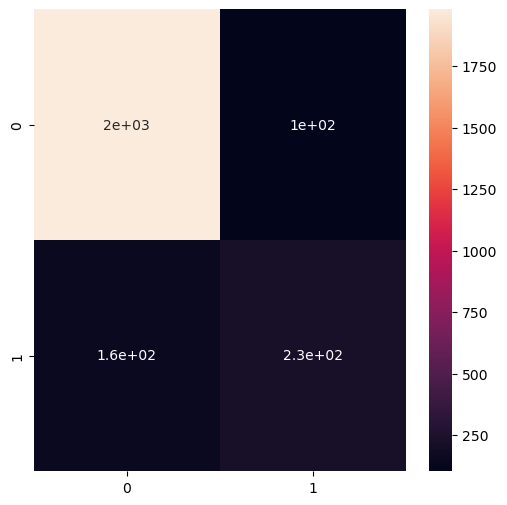

In [26]:
## XGBoost with Normal Data
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = XGBClassifier()

model.fit(xsc_train, y_train)

models.append({'model' : model, 'label': 'XGBoost', 'x_test': xsc_test, 'y_test': y_test})


y_pred = model.predict(xsc_test)
evaluate_model(y_test, y_pred)

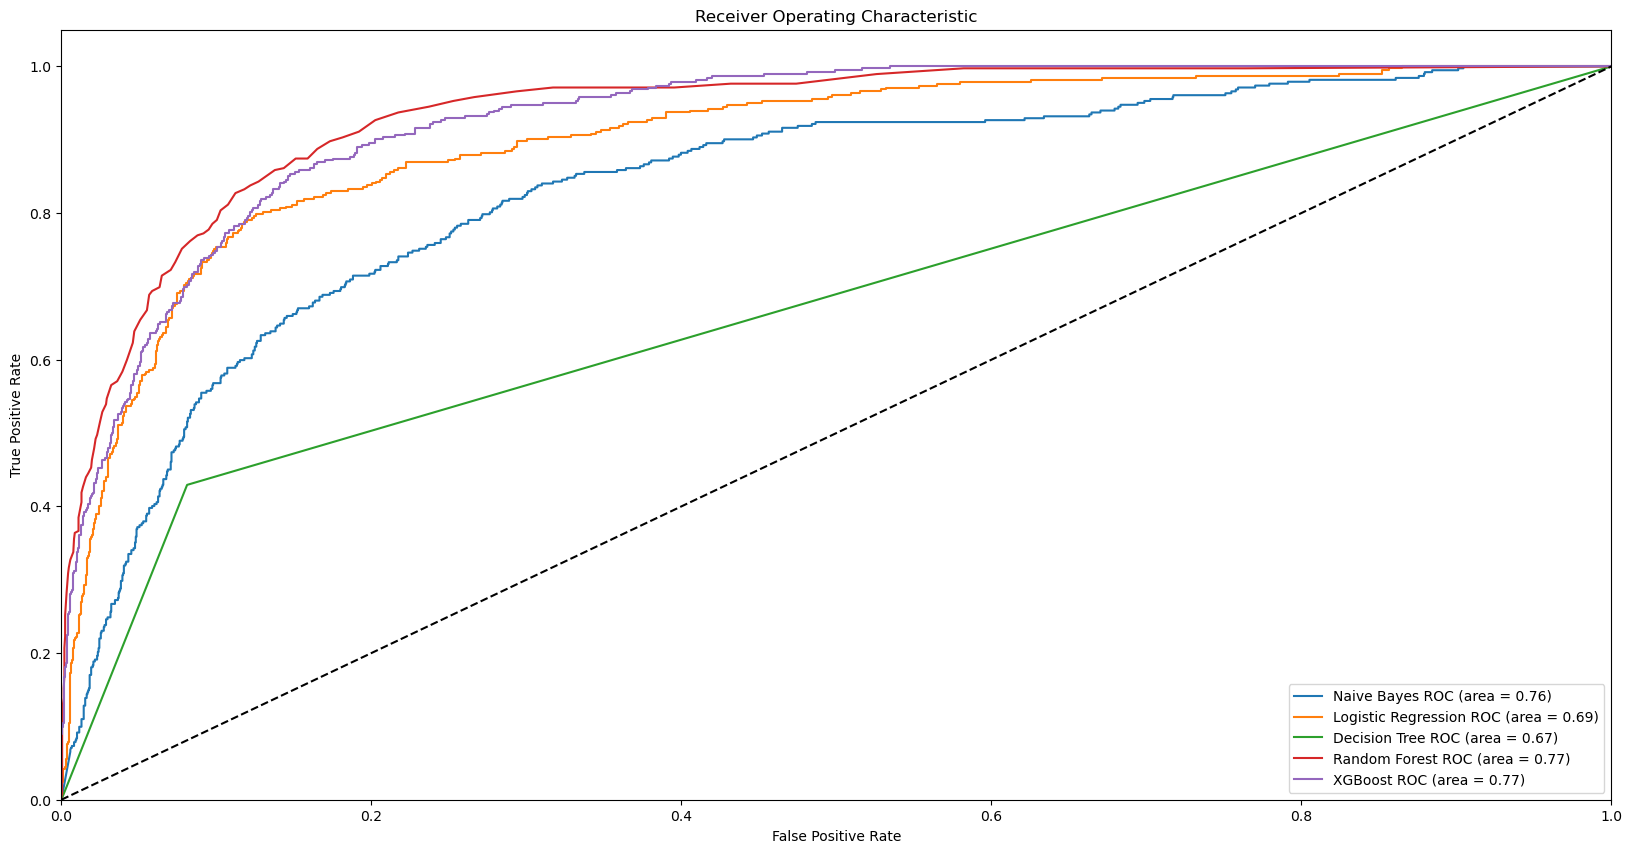

In [27]:
## ROC PLOT for Normalized data

plt.figure(figsize=(20,10))
for m in models:
  model = m['model']
  x_test = m['x_test']
  y_test = m['y_test']
  pred_proba = model.predict_proba(x_test)
  if m['label'] != 'Neural Network':
    pred_proba = pred_proba[:,1]
  # Compute False postive rate, and True positive rate
  fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
  # Calculate Area under the curve to display on the plot
  auc = roc_auc_score(y_test,model.predict(x_test))
  # Now, plot the computed values
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
# feature selection by Principal Component Analysis

from sklearn.decomposition import PCA

pca = PCA(n_components = None)

xpca_train = pca.fit_transform(xsc_train)
xpca_test = pca.transform(xsc_test)

Testing Accuracy :  0.8410381184103812
Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2084
           1       0.48      0.41      0.44       382

    accuracy                           0.84      2466
   macro avg       0.69      0.66      0.67      2466
weighted avg       0.83      0.84      0.84      2466

[[1919  165]
 [ 227  155]]
Sensitivity/tp_rate =  0.40575916230366493
Specificity/tn_rate =  0.9208253358925144
fp rate =  0.07917466410748561
fn rate =  0.5942408376963351
Confusion Matrix :


(0.40575916230366493,
 0.9208253358925144,
 0.07917466410748561,
 0.5942408376963351)

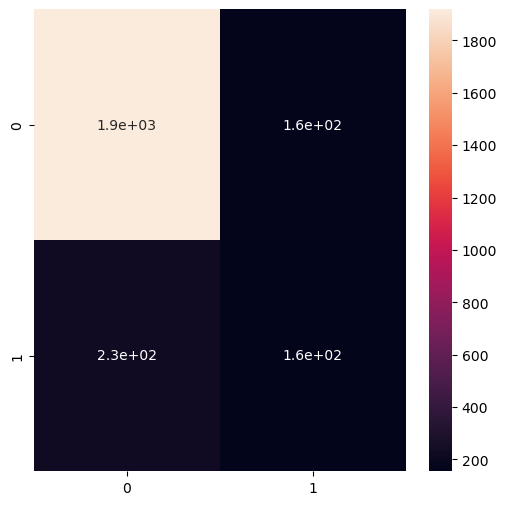

In [29]:
## NAIVE BAYES with PCA
models_pca = []
gnb = GaussianNB()

#x, y = smote_data(X_train, y_train)

y_pred = gnb.fit(xpca_train, y_train).predict(xpca_test)

models_pca.append({'model' : gnb, 'label': 'Naive Bayes', 'x_test': xpca_test, 'y_test': y_test})

#print('Training Accuracy : ', gnb.score(xpca_train, y_train))

evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8856447688564477
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2084
           1       0.75      0.40      0.52       382

    accuracy                           0.89      2466
   macro avg       0.82      0.69      0.73      2466
weighted avg       0.87      0.89      0.87      2466

[[2033   51]
 [ 231  151]]
Sensitivity/tp_rate =  0.39528795811518325
Specificity/tn_rate =  0.97552783109405
fp rate =  0.024472168905950095
fn rate =  0.6047120418848168
Confusion Matrix :


(0.39528795811518325,
 0.97552783109405,
 0.024472168905950095,
 0.6047120418848168)

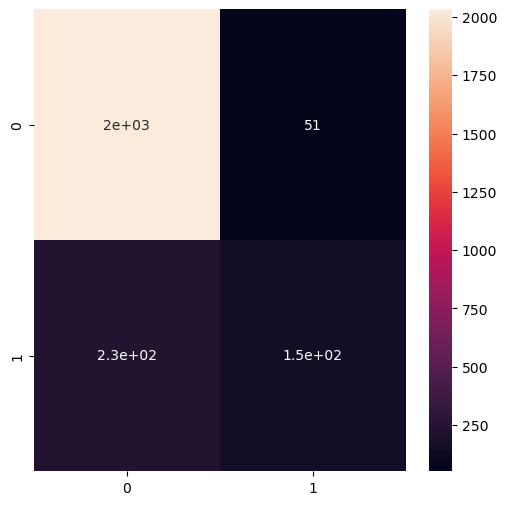

In [30]:
## Logistic Regression with PCA
model = LogisticRegression(max_iter=4000)

#x, y = smote_data(x_train, y_train)
model.fit(xpca_train, y_train)

y_pred = model.predict(xpca_test)


models_pca.append({'model' : model, 'label': 'Logistic Regression', 'x_test': xpca_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8288726682887266
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2084
           1       0.45      0.50      0.47       382

    accuracy                           0.83      2466
   macro avg       0.68      0.69      0.69      2466
weighted avg       0.84      0.83      0.83      2466

[[1854  230]
 [ 192  190]]
Sensitivity/tp_rate =  0.4973821989528796
Specificity/tn_rate =  0.8896353166986565
fp rate =  0.11036468330134357
fn rate =  0.5026178010471204
Confusion Matrix :


(0.4973821989528796,
 0.8896353166986565,
 0.11036468330134357,
 0.5026178010471204)

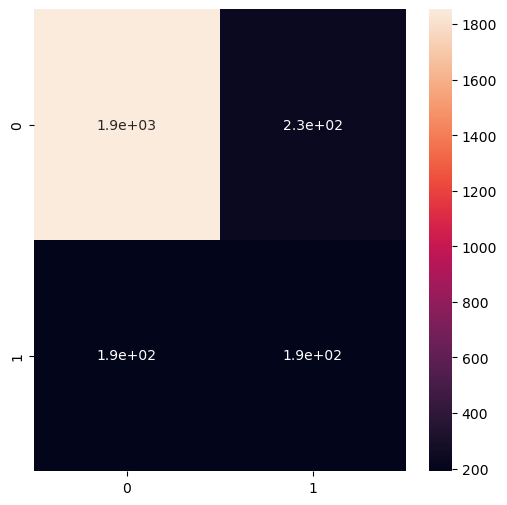

In [31]:
## Decision Tree with PCA
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xpca_train, y_train)

y_pred = model.predict(xpca_test)

models_pca.append({'model' : model, 'label': 'Decison Tree', 'x_test': xpca_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8909164639091647
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2084
           1       0.77      0.42      0.54       382

    accuracy                           0.89      2466
   macro avg       0.84      0.70      0.74      2466
weighted avg       0.88      0.89      0.88      2466

[[2036   48]
 [ 221  161]]
Sensitivity/tp_rate =  0.4214659685863874
Specificity/tn_rate =  0.9769673704414588
fp rate =  0.023032629558541268
fn rate =  0.5785340314136126
Confusion Matrix :


(0.4214659685863874,
 0.9769673704414588,
 0.023032629558541268,
 0.5785340314136126)

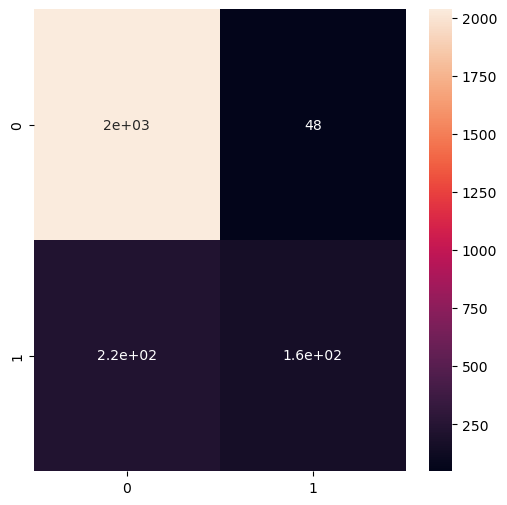

In [32]:
## Random Forests with PCA
model = RandomForestClassifier()
model.fit(xpca_train, y_train)

y_pred = model.predict(xpca_test)

models_pca.append({'model' : model, 'label': 'Random Forest', 'x_test': xpca_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8913219789132197
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2084
           1       0.71      0.51      0.59       382

    accuracy                           0.89      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466

[[2003   81]
 [ 187  195]]
Sensitivity/tp_rate =  0.5104712041884817
Specificity/tn_rate =  0.9611324376199616
fp rate =  0.03886756238003839
fn rate =  0.4895287958115183
Confusion Matrix :


(0.5104712041884817,
 0.9611324376199616,
 0.03886756238003839,
 0.4895287958115183)

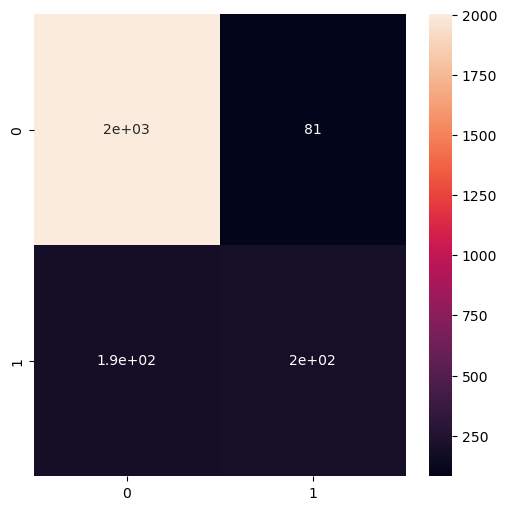

In [34]:
## XGBoost with PCA Data

from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = XGBClassifier()

model.fit(xpca_train, y_train)

models_pca.append({'model' : model, 'label': 'XGBoost', 'x_test': xpca_test, 'y_test': y_test})

y_pred = model.predict(xpca_test)
evaluate_model(y_test, y_pred)

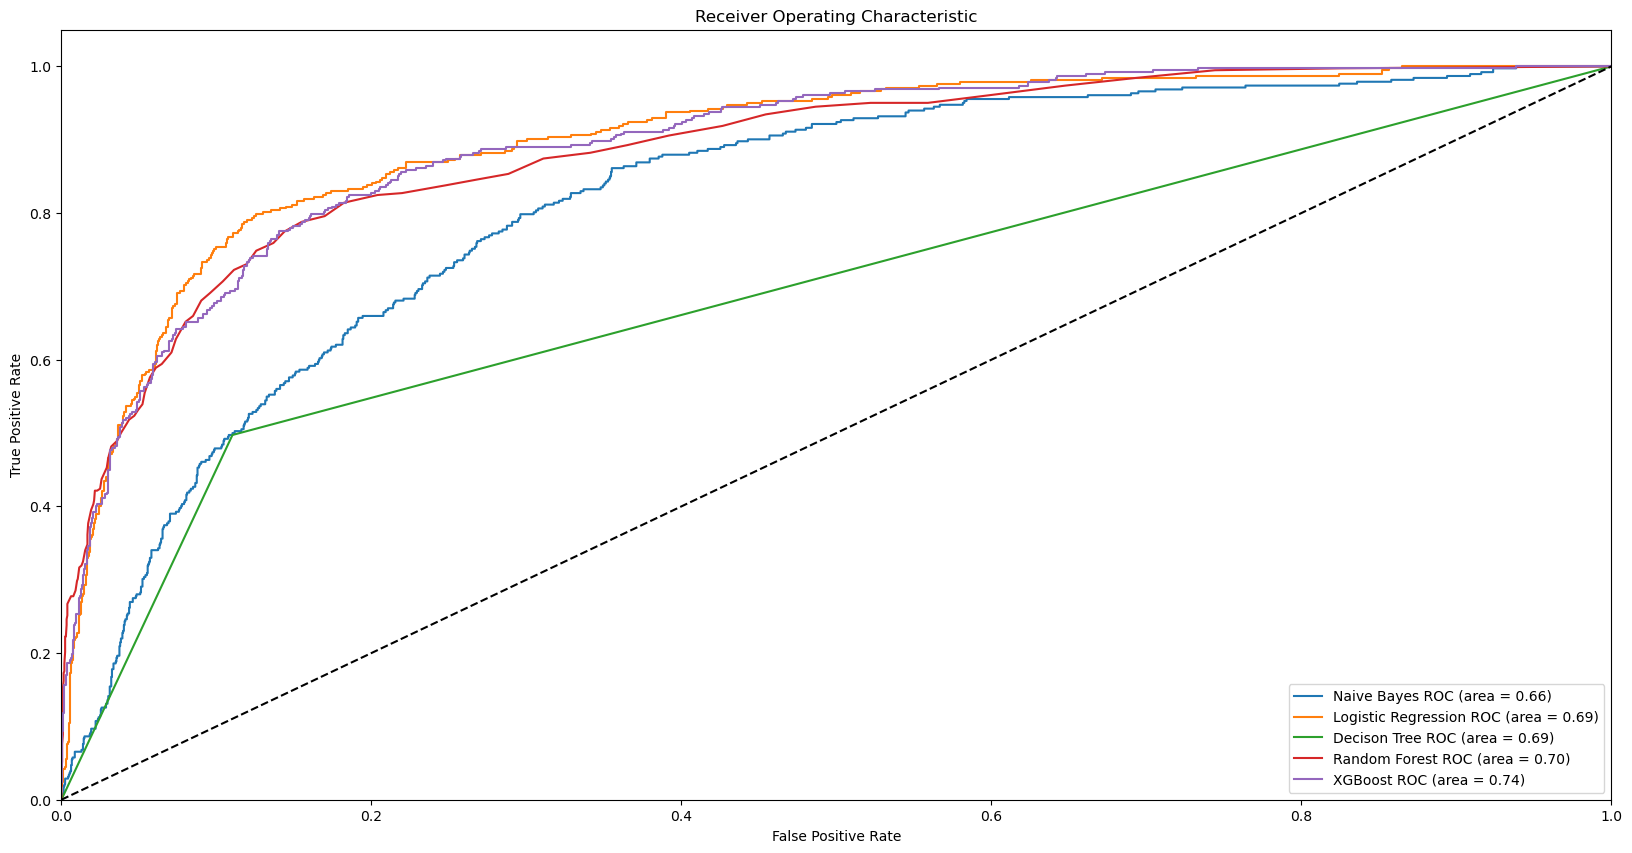

In [35]:
## ROC curve of Models with PCA

plt.figure(figsize=(20,10))
for m in models_pca:
  model = m['model']
  x_test = m['x_test']
  y_test = m['y_test']
  pred_proba = model.predict_proba(x_test)
  if m['label'] != 'Neural Network':
    pred_proba = pred_proba[:,1]
  # Compute False postive rate, and True positive rate
  fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
  # Calculate Area under the curve to display on the plot
  auc = roc_auc_score(y_test,model.predict(x_test))
  # Now, plot the computed values
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()